In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.datasets import load_iris

In [3]:
data=load_iris()
df = pd.DataFrame( data['data'], columns=data['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
target=data['target']

In [6]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
features=df
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


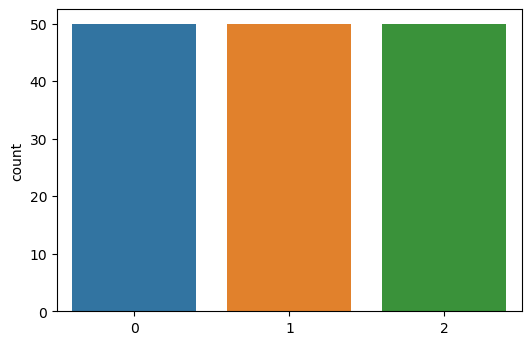

In [8]:
plt.figure(dpi=100)
sns.countplot(target)
plt.show()

In [9]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.20)

In [10]:
x_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
78,6.0,2.9,4.5,1.5
89,5.5,2.5,4.0,1.3
5,5.4,3.9,1.7,0.4
92,5.8,2.6,4.0,1.2
90,5.5,2.6,4.4,1.2


In [11]:
y_train[:5]

array([1, 1, 0, 1, 1])

In [12]:
model=LogisticRegression()

In [13]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
pred = model.predict(x_test)

In [15]:
pred[:5]

array([2, 2, 0, 1, 1])

In [16]:
y_test[:5]

array([2, 2, 0, 1, 1])

In [17]:
print(confusion_matrix(y_test,pred))

[[ 9  0  0]
 [ 0  8  0]
 [ 0  1 12]]


In [18]:
print(accuracy_score(y_test,pred)*100)

96.66666666666667


In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [30]:
import pickle
fp=open('iris.pk1','wb')
pickle.dump(model,fp)
fp.close()

In [ ]:
import tkinter as tk
import PIL.Image
import PIL.ImageTk

with open('iris.pk1', 'rb') as fp:
    model = pickle.load(fp)
    fp.close()
    
root=tk.Tk()
root.title('Iris Flower')
canvas = tk.Canvas(root, height=600, width=800)
im = PIL.Image.open("iris.jpg")
photo = PIL.ImageTk.PhotoImage(im)
background_label = tk.Label(root,image=photo)
background_label.place(relx=0, rely=0, relwidth=1, relheight=1)
canvas.pack()


sepal_l=tk.DoubleVar()
sepal_w=tk.DoubleVar()
petal_l=tk.DoubleVar()
petal_w=tk.DoubleVar()

l=tk.Label(root,text="Category of Iris",relief='sunken',bd=2)
l.config(bg='#ffe7bf',fg='#333333', font=('Comic Sans MS', 20, 'bold'))
l.place(relx=0.83, rely=0.02, relwidth=0.28, relheight=0.06, anchor='n')

l1 = tk.Label(root, text="Sepal Length"+" : ",relief='sunken')
l1.config(bg='#FFFFFF', fg='#333333', font=('Comic Sans MS', 12, 'bold'))
l1.place(relx=0.75, rely=0.2, relwidth=0.17, relheight=0.06)

e1 = tk.Entry(root,textvariable=sepal_l,bg='#FFFFFF',fg='#030200',font=('Comic Sans MS', 12,'bold'))
e1.place(relx=0.92, rely=0.2, relwidth=0.05, relheight=0.06)

l2 = tk.Label(root, text="Sepal Width"+" : ",relief='sunken')
l2.config(bg='#FFFFFF', fg='#333333', font=('Comic Sans MS', 12, 'bold'))
l2.place(relx=0.75, rely=0.26, relwidth=0.17, relheight=0.06)

e2 = tk.Entry(root,textvariable=sepal_w,bg='#FFFFFF',fg='#030200',font=('Comic Sans MS', 12,'bold'))
e2.place(relx=0.92, rely=0.26, relwidth=0.05, relheight=0.06)

l3 = tk.Label(root, text="Petal Length"+" : ",relief='sunken')
l3.config(bg='#FFFFFF', fg='#333333', font=('Comic Sans MS', 12, 'bold'))
l3.place(relx=0.75, rely=0.32, relwidth=0.17, relheight=0.06)

e3 = tk.Entry(root,textvariable=petal_l,bg='#FFFFFF',fg='#030200',font=('Comic Sans MS', 12,'bold'))
e3.place(relx=0.92, rely=0.32, relwidth=0.05, relheight=0.06)

l4 = tk.Label(root, text="Petal Width"+" : ",relief='sunken')
l4.config(bg='#FFFFFF', fg='#333333', font=('Comic Sans MS', 12, 'bold'))
l4.place(relx=0.75, rely=0.38, relwidth=0.17, relheight=0.06)

e4 = tk.Entry(root,textvariable=petal_w,bg='#FFFFFF',fg='#030200',font=('Comic Sans MS', 12,'bold'))
e4.place(relx=0.92, rely=0.38, relwidth=0.05, relheight=0.06)

b = tk.Button(root, text='Submit', command=lambda : predict())
b.config(bg='#eeeeee', fg='black', font=('Comic Sans MS', 12, 'bold'),border=5)
b.place(relx=0.89, rely=0.47, relwidth=0.08, relheight=0.06)

def predict():
    sl=sepal_l.get()   
    sw=sepal_w.get()
    pl=petal_l.get()
    pw=petal_w.get()
    features = [ [ sl,sw,pl,pw] ]
    m = model.predict(features)[0]
    if m==0:
        text ="It is of Setosa Category."
    elif m==1:
        text ="It is of Versicolor Category."
    else:
        text ="It is of Verginica Category."
    label = tk.Label(root,text=text,relief='sunken')
    label.config(bg='#fff0e0',fg='#333333',font=('Comic Sans MS', 12,'bold'))
    label.place(relx=0.68, rely=0.7, relwidth=0.3, relheight=0.07)



root.mainloop()
